### The Genetic Code

Just as nucleic acids are polymers of nucleotides, proteins are chains of amino acids; 20 amino acids commonly appear in every species. 

The structure of a protein is determined by the order of amino acids, just as DNA is determined by the order of its bases. 

Proteins power every practical function carried out by the cell, so presumably the key to understanding life lies in interpreting the relationship between a chain of amino acids and the function of the protein. 

The central dogma of molecular biology is that proteins are always made from RNA, which in turn is always created from DNA. 

Ribosomes create peptides using helper molecule tRNA, which has a string of 3 RNA nucleotides on one end (anticodon) and an amino acid on the other end. 

The ribosome takes an RNA molecule transcribed from DNA (mRNA) and examines it one codon at a time. A codon is a set of 3 nucleobase strings, and each codon codes for a specific type of amino acid.

 At each step, the tRNA possessing the complementary anticodon bonds to the mRNA at this location, and the amino acid on the opposite end of the tRNA is added to the growing peptide chain before the remaining part of the tRNA is ejected into the cell, and the ribosome looks for the next tRNA molecule. 

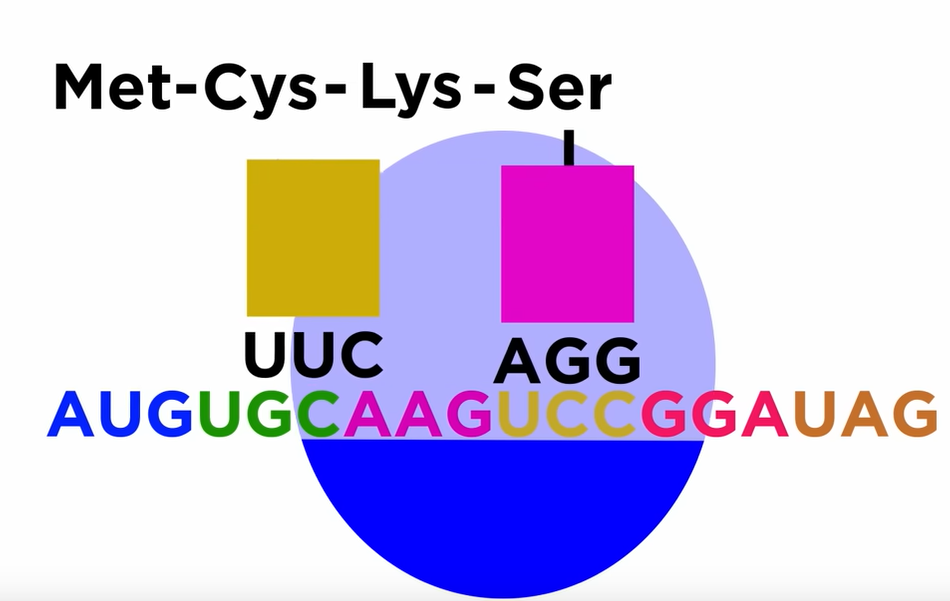

Not every RNA strand will be translated into a protein. The ones that do are of great biological interest and called genes. Because protein creation drives cellular processes, genes differentiate organisms and serve as a basis for heredity. 

The problem with translation is that 4 RNA bases must be translated into a language of 20 amino acids. There are $4^3 = 64$ possible types of amino acids. 

### Problem 
The 20 common amino acids are represented by 20 letters of the English alphabet (except B,J,O,U,X,and Z). Protein strings are constructed from tehse 20 symbols. 

A **genetic string** will incorporate protein strings along with DNA strings and RNA strings. 

The **RNA codon table** dictates the details regarding the encoding of specific codons into the amino acid alphabet. 

### Given 
> An RNA string $s$ corresponding to a strand of mRNA (of length at most 10 kbp)
### Return 
> The protein string encoded by $s$ 

### Sample Dataset 
```
AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA
```

### Sample Output 
```
MAMAPRTEINSTRING
```

In [59]:
import re

def protein_translation(filename):

    with open(filename) as fh:
        RNA_string = fh.read().strip()

    # define codon dictionary 
    codon_table = """ 
    UUU F      CUU L      AUU I      GUU V
    UUC F      CUC L      AUC I      GUC V
    UUA L      CUA L      AUA I      GUA V
    UUG L      CUG L      AUG M      GUG V
    UCU S      CCU P      ACU T      GCU A
    UCC S      CCC P      ACC T      GCC A
    UCA S      CCA P      ACA T      GCA A
    UCG S      CCG P      ACG T      GCG A
    UAU Y      CAU H      AAU N      GAU D
    UAC Y      CAC H      AAC N      GAC D
    UAA Stop   CAA Q      AAA K      GAA E
    UAG Stop   CAG Q      AAG K      GAG E
    UGU C      CGU R      AGU S      GGU G
    UGC C      CGC R      AGC S      GGC G
    UGA Stop   CGA R      AGA R      GGA G
    UGG W      CGG R      AGG R      GGG G 
    """

    expression = r'([A-Z]{3})\s([A-Z][a-z]{0,3})' #capturing groups
    matches = re.findall(expression,codon_table)
    conversion = {codon:amino_acid for codon, amino_acid in matches} # dictionary comprehension

    protein_string = ''

    for i in range(0,len(RNA_string),3):
        threebases = RNA_string[i:i+3]
        if threebases not in conversion: # codon does not code for AA 
            protein_string += 'X'
            print("Codon",threebases,"at position",i,"does not code for an amino acid and has been replaced with 'X'") 
        elif conversion[threebases] == 'Stop': # stop codon encountered
            print(protein_string)
            break
        else:
            protein_string += conversion[threebases]

protein_translation("datasets/rosalind_prot.txt")

MCSCPWDSLFLGRVESLVLVTSWCVRTARLLPELGRFYLTALRVATVSSSTTNTIAPRTTGHCRTPPMILLVTRLRLATRQRPGCVALHQVMSDSKSFKVVAVTARLQIGLCTHLGELCNRVVGYSPSLAEVVWVYRAHFDIRCTRTDRINSWIVEHTRTRFSACGWFRDRHSPRNRGRKIRICVYAARTSSALFSSLHVTLRWLSEKMPAMASGFASGETVGTCTLSIIVRSTRQQIGREIRNWGFRRGEVTVKESMVFRVDYTRTMTPCMGDFLCDSHGLHLKLARLWAGWRRTQPTIAYGYSLGEQLSRGRSNHMVGVSGHDHYYCGCIARYDVCRSSIIDPSMNSPLNRVVINSAPRGSESQDFLNLGVGSIGGPLEPREQAQGIVQCSILRITAVSEDCPSTSQSVKVLFYRTCYVCRATHRLKNGLIVRLNFPAIQLGHLWNSENAPLAARNSEPVVIFRSRKCPPTAARALQSVQYKRVASNQWGHEDLSRLVICGPAGVGVHTKVSKIMHERTYRRDRVVVRQYLVPIHIINSRARNLTPHPSRTLPPGFGLVRPLKSAYHTSAKTGLVILRKSNRDGTYERYEYLPHNIHILQLGAMLGAYARHSGSRLGLLLNSISNARSVPLQSPDVLNPSEVGANADMMSRGYSSCAYENPGKPNIKRAGSSCCETTRGYSYSLDCTYVPLPDICQRTTTLIYVACALTEACEIKEPRLSLPDHLFRFSRTSPHPAPEINHLLERDNRRTCCCMYNPRKALRCQAFTFPPYSYKIIGICQSSKFAPVRDADFFFLRSVNVSSRCIIGLSLHNETSCHIAYGHQFGIAQRKAYTASNKTVLADPSWTGMSLEYTQALRPCNMSRSGRYYGLSRLTWVLIRPLECGVVGMNVTPFMGILGTLYIPRIPKSEPPTLRVNSLRGEVYMGVARPFPAYLSSEDPFGEPEYLDSSPAYGIAGNPKHHVEHFACFLVVTMSFCLVNRGGVTQLSWNDSPYEFFNV

In [60]:
# added "codon" ABC to a random position in rosalind_prot.txt to check the error handling

protein_translation("datasets/rosalind_prot_missing.txt")

Codon ABC at position 630 does not code for an amino acid and has been replaced with 'X'
MCSCPWDSLFLGRVESLVLVTSWCVRTARLLPELGRFYLTALRVATVSSSTTNTIAPRTTGHCRTPPMILLVTRLRLATRQRPGCVALHQVMSDSKSFKVVAVTARLQIGLCTHLGELCNRVVGYSPSLAEVVWVYRAHFDIRCTRTDRINSWIVEHTRTRFSACGWFRDRHSPRNRGRKIRICVYAARTSSALFSSLHVTLRWLSEKMPXAMASGFASGETVGTCTLSIIVRSTRQQIGREIRNWGFRRGEVTVKESMVFRVDYTRTMTPCMGDFLCDSHGLHLKLARLWAGWRRTQPTIAYGYSLGEQLSRGRSNHMVGVSGHDHYYCGCIARYDVCRSSIIDPSMNSPLNRVVINSAPRGSESQDFLNLGVGSIGGPLEPREQAQGIVQCSILRITAVSEDCPSTSQSVKVLFYRTCYVCRATHRLKNGLIVRLNFPAIQLGHLWNSENAPLAARNSEPVVIFRSRKCPPTAARALQSVQYKRVASNQWGHEDLSRLVICGPAGVGVHTKVSKIMHERTYRRDRVVVRQYLVPIHIINSRARNLTPHPSRTLPPGFGLVRPLKSAYHTSAKTGLVILRKSNRDGTYERYEYLPHNIHILQLGAMLGAYARHSGSRLGLLLNSISNARSVPLQSPDVLNPSEVGANADMMSRGYSSCAYENPGKPNIKRAGSSCCETTRGYSYSLDCTYVPLPDICQRTTTLIYVACALTEACEIKEPRLSLPDHLFRFSRTSPHPAPEINHLLERDNRRTCCCMYNPRKALRCQAFTFPPYSYKIIGICQSSKFAPVRDADFFFLRSVNVSSRCIIGLSLHNETSCHIAYGHQFGIAQRKAYTASNKTVLADPSWTGMSLEYTQALRPCNMSRSGRYYGLSRLTWVLIRPLECGVVGMNVTPFMGILGTLYIPRIPKS